In [2]:
import pandas as pd

# Código para ler o arquivo em xls e retorná-lo em dataframe
dfbr = pd.read_excel("dados brasileirao.xlsx") 

# Nesta linha, foram retiradas todas as colunas que possuiam dados relativos à estáticas após o começo do jogo. Os Dados após o jogo começar não nos ajudam a prever os nossos resultados, pois são muito específicos de cada jogo. Então vamos analisar o principal: número de gols
dfbr = dfbr.drop(["escanteios_man", "escanteios_vis", "publico_max", "faltas_man", "faltas_vis", "chutes_bola_parada_man", "chutes_bola_parada_vis", "defesas_man", "defesas_vis", "impedimentos_man", "impedimentos_vis", "chutes_man", "chutes_vis", "chutes_fora_man", "chutes_fora_vis", "gols_1_tempo_man", "gols_1_tempo_vis"], axis=1)

# Nesta linha, foram tiradas todas as linhas que possuiam dados faltantes, visto que os anos iniciais não tinham todos os dados da tabela preenchidos.
dfbr = dfbr.dropna(axis = 0)

# Nesta linha, são redefinidos os índices para facilitar o trabalho com os dados e foi feito após retirar os dados que não íamos precisar.
dfbr = dfbr.reset_index()

# Nesta parte, foram retiradas as colunas "index" e "Unnamed: 0" para facilitar o trabalho com os dados (Eram colunas com repetição de índices antigos)
dfbr = dfbr.drop(columns=["index", "Unnamed: 0"])

c:\venv\ilumpy\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# O código a seguir cria um dataframe contendo as faixas de público e as respectivas médias de gols associadas a elas
pub_max = dfbr["publico"].max()
pub_max_norm = pub_max/25
publico_gols = ["publico", "gols_man", "gols_vis"]
dfbr_publico_gols = dfbr[publico_gols]
lista_medias_publico = []
lista_medias_gols_publico = []

for i in range(25):
    n_menor = i*pub_max_norm
    n_maior = (i+1)*pub_max_norm
    dfbr_publico_gols_sep = dfbr_publico_gols.loc[(dfbr_publico_gols["publico"] >= n_menor) & (dfbr_publico_gols["publico"] < n_maior)]
    media_gols_publico_sep = dfbr_publico_gols_sep["gols_man"].mean()
    media_publico = (n_menor + n_maior)/2
    lista_medias_publico.append(media_publico)
    lista_medias_gols_publico.append(media_gols_publico_sep)

dic_publico_gols = {
    "publico_medio": lista_medias_publico,
    "gols_man": lista_medias_gols_publico,
}

dfpg = pd.DataFrame.from_dict(dic_publico_gols)

In [4]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do mandante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()
valor_max_norm = valor_max/10
valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]
dfbr_valor_gols = dfbr[valor_gols]
lista_medias_valor = []
lista_medias_gols_valor = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_man"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor.append(media_gols_valor_sep)
    
dic_valor_gols = {
    "valor_medio": lista_medias_valor,
    "gols_man": lista_medias_gols_valor,
}

dfvg = pd.DataFrame.from_dict(dic_valor_gols)

In [5]:
# O código a seguir cria um dataframe contendo as faixas de valor do clube mandante e as respectivas médias de gols do time visitante associadas a elas
valor_max = dfbr["valor_equipe_titular_man"].max()

valor_max_norm = valor_max/10

valor_gols = ["valor_equipe_titular_man", "gols_man", "gols_vis"]

dfbr_valor_gols = dfbr[valor_gols]

lista_medias_valor = []

lista_medias_gols_valor_vis = []

for i in range(10):
    n_menor = i*valor_max_norm
    n_maior = (i+1)*valor_max_norm
    
    dfbr_valor_gols_sep = dfbr_valor_gols.loc[(dfbr_valor_gols["valor_equipe_titular_man"] >= n_menor) & (dfbr_valor_gols["valor_equipe_titular_man"] < n_maior)]
    media_gols_valor_sep = dfbr_valor_gols_sep["gols_vis"].mean()
    media_valor = (n_menor + n_maior)/2
    lista_medias_valor.append(media_valor)
    lista_medias_gols_valor_vis.append(media_gols_valor_sep)
    
dic_valor_gols_vis = {
    "valor_medio_man": lista_medias_valor,
    "gols_vis": lista_medias_gols_valor_vis,
}

dfvgv = pd.DataFrame.from_dict(dic_valor_gols_vis)

In [6]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time mandante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep = dfbr_colocacao_gols_sep["gols_man"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao.append(media_gols_colocacao_sep)
    
dic_colocacao_gols = {
    "colocacao_man": lista_colocacao,
    "gols_man": lista_medias_gols_colocacao,
}

dfcg = pd.DataFrame.from_dict(dic_colocacao_gols)

In [7]:
# O código a seguir cria um dataframe contendo as colocações do clube mandante e as respectivas médias de gols do time visitante associadas a elas
colocacao_gols = ["colocacao_man", "gols_man", "gols_vis"]

dfbr_colocacao_gols = dfbr[colocacao_gols]

lista_colocacao = []

lista_medias_gols_colocacao_vis = []

for i in range(20, 0, -1):
    
    dfbr_colocacao_gols_sep = dfbr_colocacao_gols.loc[(dfbr_colocacao_gols["colocacao_man"] == i)]
    media_gols_colocacao_sep_vis = dfbr_colocacao_gols_sep["gols_vis"].mean()
    lista_colocacao.append(i)
    lista_medias_gols_colocacao_vis.append(media_gols_colocacao_sep_vis)
    
dic_colocacao_gols_vis = {
    "colocacao_man": lista_colocacao,
    "gols_vis": lista_medias_gols_colocacao_vis,
}

dfcgv = pd.DataFrame.from_dict(dic_colocacao_gols_vis)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

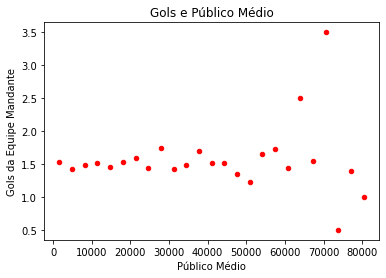

In [10]:
# Nesta linha, são plotados os gráficos de média de gols em cada faixa de público

fig = plt.figure()
ax1 = fig.add_subplot(111)
dfpg.plot('publico_medio','gols_man',legend=True, ax=ax1, kind = 'scatter', color = 'red')
plt.title('Gols e Público Médio')
plt.xlabel('Público Médio')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Público.png', dpi=100, format='png', facecolor='white')
plt.show()

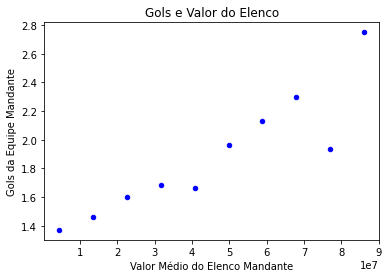

In [11]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada faixa de valor do mandante

fig1 = plt.figure()
ax2 = fig1.add_subplot(111)
dfvg.plot('valor_medio','gols_man',legend=True, ax=ax2, kind = 'scatter', color = 'blue')
plt.title('Gols e Valor do Elenco')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Valor do Elenco.png', dpi=100, format='png', facecolor='white')
plt.show()

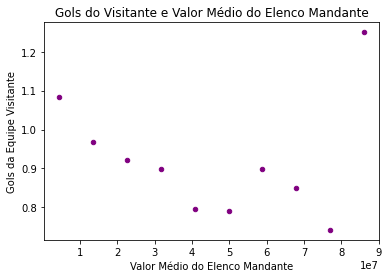

In [12]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada faixa de valor do mandante

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
dfvgv.plot('valor_medio_man','gols_vis',legend=True, ax=ax3, kind = 'scatter', color = 'purple')
plt.title('Gols do Visitante e Valor Médio do Elenco Mandante')
plt.xlabel('Valor Médio do Elenco Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Valor do Elenco Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

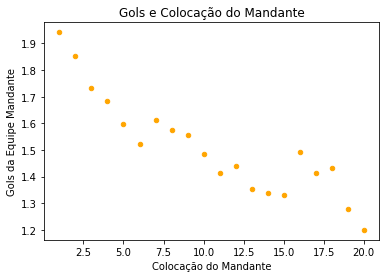

In [13]:
# Nesta linha, são plotados os gráficos de média de gols do mandante em cada colocação do mandante

fig3 = plt.figure()
ax4 = fig3.add_subplot(111)
dfcg.plot('colocacao_man','gols_man',legend=True, ax=ax4, kind = 'scatter', color = 'orange')
plt.title('Gols e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Mandante')
#plt.savefig('Gols e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

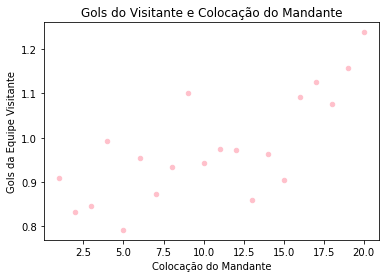

In [14]:
# Nesta linha, são plotados os gráficos de média de gols do visitante em cada colocação do mandante

fig4 = plt.figure()
ax5 = fig4.add_subplot(111)
dfcgv.plot('colocacao_man','gols_vis',legend=True, ax=ax5, kind = 'scatter', color = 'pink')
plt.title('Gols do Visitante e Colocação do Mandante')
plt.xlabel('Colocação do Mandante')
plt.ylabel('Gols da Equipe Visitante')
#plt.savefig('Gols do Visitante e Colocação do Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

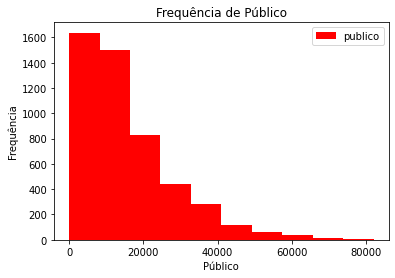

In [15]:
# Nesta linha, foi plotado um histograma da quantidade de público nos jogos

fig5 = plt.figure()
ax6 = fig5.add_subplot(111)
dfbr['publico'].plot(legend=True, ax=ax6, kind = 'hist', color = 'red')
plt.title('Frequência de Público')
plt.xlabel('Público')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Público.png', dpi=100, format='png', facecolor='white')
plt.show()

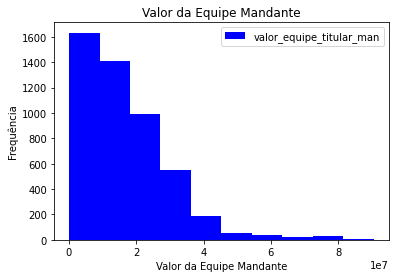

In [16]:
# Nesta linha, foi plotado um histograma do valor da equipe titular do mandante

fig6 = plt.figure()
ax7 = fig6.add_subplot(111)
dfbr["valor_equipe_titular_man"].plot(legend=True, ax=ax7, kind = 'hist', color = 'blue')
plt.title('Valor da Equipe Mandante')
plt.xlabel('Valor da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência de Valor da Equipe Mandante.png', dpi=100, format='png', facecolor='white')
plt.show()

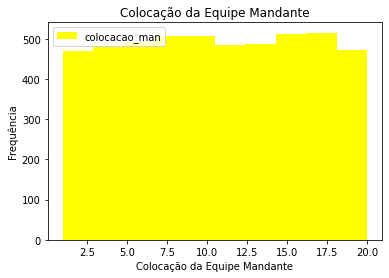

In [17]:
# Nesta linha, foi plotado um histograma da colocação da equipe mandante.

fig7 = plt.figure()
ax8 = fig7.add_subplot(111)
dfbr["colocacao_man"].plot(legend=True, ax=ax8, kind = 'hist', color = 'yellow')
plt.title('Colocação da Equipe Mandante')
plt.xlabel('Colocação da Equipe Mandante')
plt.ylabel('Frequência')
#plt.savefig('Frequência da Colocação.png', dpi=100, format='png', facecolor='white')
plt.show()

In [36]:
# Divisão dos dados do dataset em treino e teste

from sklearn.model_selection import train_test_split # Divisão feita usando a função train_test_split

TAMANHO_TESTE = 0.2 # Porcentagem destinada do dataset ao grupo de teste
SEMENTE_ALEATORIA = 612210 # Definição de uma seed para evitar mudança desses grupos

# Escolha dos índices e seleção feita pela função
indices = dfbr.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

# Atribuição dos índices escolhidos aos dados
dfbr_treino = dfbr.loc[indices_treino].sort_index()
dfbr_teste = dfbr.loc[indices_teste].sort_index()

# Aqui são escolhidos os atributos do dataset e é definido o target 

FEATURES = ["valor_equipe_titular_man","publico","idade_media_titular_man","colocacao_man","valor_equipe_titular_vis","idade_media_titular_vis","colocacao_vis","gols_vis"]
TARGET = ["gols_man"]

# Divide os dados para se adequarem aos modelos

X_treino = dfbr_treino.reindex(FEATURES, axis=1).values
y_treino = dfbr_treino.reindex(TARGET, axis=1).values
X_teste = dfbr_teste.reindex(FEATURES, axis=1).values
y_teste = dfbr_teste.reindex(TARGET, axis=1).values

In [37]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

# Cria um modelo baseline para termos uma base de comparação com outros modelos
modelo_baseline = DummyRegressor()

# Treina o modelo de acordo com os dados escolhidos antes
modelo_baseline.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_baseline = modelo_baseline.predict(X_teste)
print(f"O time mandante faria {previsao_baseline[0]} gols")

# Verificando o erro do modelo usando o RMSE (root mean squared error)
y_verdadeiro = y_teste
y_previsao_baseline = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_baseline, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE} gols.")

O time mandante faria 1.5017784552845528 gols
O RMSE do modelo baseline foi de 1.1947758740554035 gols.


In [38]:
from sklearn.linear_model import LinearRegression

# Cria um modelo linear
modelo_linear = LinearRegression()

# Treina esse modelo 
modelo_linear.fit(X_treino, y_treino)

# Realiza uma previsão usando o modelo treinado
previsao_linear = modelo_linear.predict(X_teste)
print(previsao_linear[0]) # Foi escolhida apenas uma linha para melhorar a visualização

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao_linear = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao_linear, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")

[1.8206451]
O RMSE do modelo linear foi de 1.150269404513419 gols.


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Usa um função normalizadora sobre os dados

normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

# Cria um modelo linear
modelo_linear_norm = LinearRegression()

# Treina esse modelo
modelo_linear_norm.fit(
    normalizador_x.transform(X_treino),
    normalizador_y.transform(y_treino),
)

# Realiza uma previsão usando o modelo linear normalizado treinado
previsao = modelo_linear_norm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

# Verificando o erro do modelo usando o RMSE (root mean squared error)

y_verdadeiro = y_teste
y_previsao = modelo_linear_norm.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE} gols.")


[[1.74746705]
 [1.65380975]
 [1.75852822]
 ...
 [1.69712343]
 [1.83454383]
 [1.72659229]]
O RMSE do modelo linear foi de 1.150269404513424 gols.


In [40]:
from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

[[1.2]
 [1. ]
 [1.6]
 [2. ]
 [1.2]
 [2. ]
 [1.6]
 [0.8]
 [0.6]
 [1.6]
 [2.6]
 [1. ]
 [1.8]
 [2. ]
 [2.6]
 [1. ]
 [1.8]
 [2. ]
 [0.6]
 [1.4]
 [2.8]
 [1.8]
 [1.6]
 [1.2]
 [2. ]
 [2. ]
 [2.2]
 [1.8]
 [1.2]
 [1.6]
 [1.4]
 [1.2]
 [2. ]
 [2.4]
 [1.6]
 [1.2]
 [1.2]
 [1.6]
 [1. ]
 [1.6]
 [1.4]
 [1.8]
 [1. ]
 [1.2]
 [2. ]
 [1.4]
 [1.6]
 [1.4]
 [3.6]
 [1.6]
 [1.2]
 [1.8]
 [2.6]
 [2. ]
 [0.8]
 [0.4]
 [1.2]
 [0.8]
 [1.4]
 [0.8]
 [0.8]
 [0.4]
 [1.6]
 [1.4]
 [0.8]
 [1. ]
 [2.4]
 [1.8]
 [1.8]
 [1.4]
 [1.4]
 [1. ]
 [1.6]
 [1.8]
 [0.8]
 [2.2]
 [1.4]
 [1.2]
 [2. ]
 [2. ]
 [0.6]
 [1. ]
 [1. ]
 [1.8]
 [1.4]
 [0.8]
 [1.4]
 [1.4]
 [0.8]
 [1.6]
 [1.4]
 [0.4]
 [1.2]
 [1.2]
 [0.6]
 [0.2]
 [1.2]
 [1. ]
 [1. ]
 [2.2]
 [0.6]
 [1.6]
 [2.2]
 [1.6]
 [1.6]
 [1.2]
 [1. ]
 [0.8]
 [1.6]
 [1. ]
 [1.6]
 [1.2]
 [1.4]
 [1.6]
 [1.6]
 [2. ]
 [1.8]
 [1.2]
 [0.8]
 [1.2]
 [0.6]
 [2.4]
 [1.4]
 [1.2]
 [1.8]
 [2.6]
 [1.2]
 [1.4]
 [1.8]
 [2.8]
 [0.8]
 [1.4]
 [1.4]
 [0.8]
 [1.6]
 [2.2]
 [2. ]
 [1.8]
 [0.6]
 [2.8]
 [1.8]
 [0.8]
 [2.6]

In [41]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE} dólares.")

O RMSE do modelo k-NN foi de 1.2644775811771012 dólares.


In [42]:
NUM_VIZINHOS = [1, 10, 100]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE} dólares.")

O RMSE do modelo k-NN usando k=1 foi de 1.6989097728377618 dólares.
O RMSE do modelo k-NN usando k=10 foi de 1.2071781922389333 dólares.
O RMSE do modelo k-NN usando k=100 foi de 1.1634094390379681 dólares.
